# Probabilidad II

# 1. Cadenas de Markov


Una cadena de Markov es un proceso aleatorio con la propiedad de Markov. Un proceso aleatorio o estocástico, es un objeto matemático definido como una colección de variables aleatorias. Una cadena de Markov tiene ya sea un espacio de estado discreto (que representaría posibles valores de variables aleatorias) o un índice discreto (usualmente representando tiempo). Usualmente el término "cadena de Markov" se utiliza para describir un proceso con un conjunto discreto de tiempos, es decir una cadena en tiempo discreto de Markov (DTMC).


## Cadena en tiempo discreto de Markov.

Una cadena en tiempo discreto involucra un sistema que cambia aleatoriamente entre pasos. Estos pasos son usualmente vistos como momentos en tiempo (no necesariamente la cantidad física). Una cadena discreta de Markov es una secuencia de variables aleatorias tales que la probabilidad de pasar al siguiente estado sólo depende del estado presente y no de los estados previos. 

\begin{equation}
Pr(X_{n+1}=x|X_1=x_1,X_2=x_2,...,X_n=x_n)=P_r(X_{n+1}=x|X_n =x_n)
\end{equation}



In [4]:
import numpy as np
import random as rm

states=["Dormir","Comer","Estudiar"]
nombreTransicion=[["DD","DC","DE"],["CD","CC","CE"],["ED","EC","EE"]]

MT=[[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

if sum(MT[0])+sum(MT[1])+sum(MT[2])!=3:
    print("No está bien")
else: print("Todo está bien, adelante!! ;)")

Todo está bien, adelante!! ;)


In [9]:
def prediccion_actividades(days):
    actividadHoy="Dormir"
    print("Estado Inicial: "+actividadHoy)
    listaActividades=[actividadHoy]
    i=0
    prob=1
    while i!=days:
        if actividadHoy!="Dormir":
            change=np.random.choice(nombreTransicion[0],replace=True,p=MT[0])
            if change=="DD":
                prob=prob*0.2
                listaActividades.append("Dormir")
                pass
            elif change=="DE":
                prob=prob*0.6
                actividadHoy="Estudiar"
                listaActividades.append("Estudiar")
            else:
                prob=prob*0.2
                actividadHoy="Comer"
                listaActividades.append("Comer")
        elif actividadHoy!="Estudiar":
            change=np.random.choice(nombreTransicion[2],replace=True,p=MT[2])
            if change=="EE":
                prob=prob*0.5
                listaActividades.append("Estudiar")
                pass
            elif change=="ED":
                prob=prob*0.2
                actividadHoy="Dormir"
                listaActividades.append("Dormir")
            else:
                prob=prob*0.3
                actividadHoy="Comer"
                listaActividades.append("Comer")

        elif actividadHoy!="Comer":
            change=np.random.choice(nombreTransicion[1],replace=True,p=MT[1])
            if change=="CC":
                prob=prob*0.1
                listaActividades.append("Comer")
                pass
            elif change=="CD":
                prob=prob*0.2
                actividadHoy="Dormir"
                listaActividades.append("Dormir")
            else:
                prob=prob*0.7
                actividadHoy="Estudiar"
                listaActividades.append("Estudiar")
        i+=1
    print("Posibles estados: "+ str(listaActividades))
    print("Estado final después de "+str(days)+"dias: "+ actividadHoy)
    print("Probabilidad de secuencia de estados posible: "+str(prob))
prediccion_actividades(2)


Estado Inicial: Dormir
Posibles estados: ['Dormir', 'Estudiar', 'Comer']
Estado final después de 2dias: Comer
Probabilidad de secuencia de estados posible: 0.15


In [9]:
def prediccion_actividades(days):
    # escoge estado inicial
    actividadHoy = "Dormir"
    listaActividades = [actividadHoy]
    i = 0
    prob = 1
    while i != days:
        if actividadHoy == "Dormir":
            change = np.random.choice(nombreTransicion[0],replace=True,p=MT[0])
            if change == "DD":
                prob = prob * 0.2
                listaActividades.append("Dormir")
                pass
            elif change == "DE":
                prob = prob * 0.6
                actividadHoy = "Estudiar"
                listaActividades.append("Estudiar")
            else:
                prob = prob * 0.2
                actividadHoy = "Comer"
                listaActividades.append("Comer")
        elif actividadHoy == "Estudiar":
            change = np.random.choice(nombreTransicion[1],replace=True,p=MT[1])
            if change == "EE":
                prob = prob * 0.5
                listaActividades.append("Estudiar")
                pass
            elif change == "ED":
                prob = prob * 0.2
                actividadHoy = "Dormir"
                listaActividades.append("Dormir")
            else:
                prob = prob * 0.3
                actividadHoy = "Comer"
                listaActividades.append("Comer")
        elif actividadHoy == "Comer":
            change = np.random.choice(nombreTransicion[2],replace=True,p=MT[2])
            if change == "CC":
                prob = prob * 0.1
                listaActividades.append("Comer")
                pass
            elif change == "CD":
                prob = prob * 0.2
                actividadHoy = "Dormir"
                listaActividades.append("Dormir")
            else:
                prob = prob * 0.7
                actividadHoy = "Estudiar"
                listaActividades.append("Estudiar")
        i += 1    
    return listaActividades

# para guardar todo listaActividades
lista_actividades = []
count = 0

for iterations in range(1,10000):
        lista_actividades.append(prediccion_actividades(2))

for listita in lista_actividades:
    if(listita[2] == "Estudiar"):
        count += 1

# Calcula la probabilidad de iniciar en:'Dormir' and ending at state:'Estudiar'
porcentaje = (count/10000) * 100
print("La probabilidad del estado inicial :'Dormir' y el estado final :'Estudiar'= " + str(porcentaje) + "%")

La probabilidad del estado inicial :'Dormir' y el estado final :'Estudiar'= 64.99000000000001%


## Metropolis-Hastings

En estadística Bayesiana se busca estimar un distribución posterior, sin embargo, esto es usualmente intratable debido a la integral en muchas dimensiones del denominador (likelihood marginal). Es posible aproximar la distribución posterior si se puede de alguna manera muestrear la distribución posterior. Con el método de MCMC, es posible obtener muestras de una distribución propuesta de manera que cada una depende únicamente del estado previo, tal como sucede con las cadenas de Markov. Bajo ciertas condiciones, la cadena de Markov tendrá una única distribución estacionaria. En adición, no todas las muestras son usadas, en cambio, se utiliza un criterio de aceptación basado en la comparación sucesiva de estados respecto a una distribución blanco para asegurar que la distribución estacionaria es la distribución a posteriori de interés. Lo interesante de esta distribución es que sólo necesita ser proporcional a la distribución posterior, lo que significa que no se necesita evaluar las likelihoods marginales potencialmente intratables, lo cual es sólo una constante de normalización.

Existen diferentes tipos de MCMC, pero la más sencilla es entender  Metropolis-Hastings, que se basa en un algoritmo de caminata aleatoria. 

Para esto, se necesita realizar un muestreo a partir de las distribuciones.

- Uniforme estándar
- La distribución propuesta (eg. N(0,$\sigma$))
- La distribución objetivo, que es proporcional a la probabilidad posterior. 


Dado un valor inicial adivinado $\theta$ con probabilidad positiva de ser dibujado, Metropolis procede así:


- Escoje un nuevo valor propuesto tal que $\theta_p =\theta+\Delta\theta$ donde $\Delta\theta \propto N(0,\sigma)$

- Calcula la razón 
\begin{equation}
\rho=\frac{g(\theta_p | X) p(\theta|\theta_p)}{g(\theta|X)}
\end{equation}

donde $g$ es la probabilidad posterior.

- Si la distribución propuesta no es simétrica, se necesita pesar la probabilidad de ser aceptada para mantener un balance (reversibilidad) de la distribución estacionaria y en su lugar calcular

\begin{equation}
\rho=\frac{p(X|\theta_p) p(\theta_p)}{p(X|\theta)p(\theta)}
\end{equation}

- Si $\rho \geq 1$ entonces $\theta=\theta_p$

- Si $\rho \leq 1$ entonces $\theta=\theta_p$ con probabilidad $\rho$ de lo contrario $\theta=\theta$ (distribución uniforme)

- Repetir.

# Ejercicio: 

1. Definir una función para un modelo a*x**2+b*x+c, que reciba (x,lista) donde lista=[a,b,c]
2. Definir una función de likelihood apropiada.
3. Definir una función prior apropiada para los datos
4. Desarrollar MCMC para ajustar con inferencia bayesiana los parámetros que mejor ajustan los datos con el modelo. 



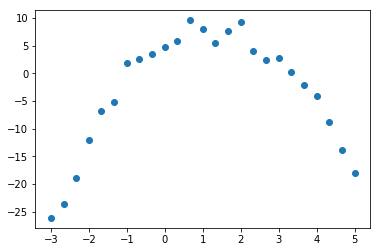

In [25]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
x=np.random.rand(25)*7
x_=np.linspace(-3,5,25)

##
PARA CREAR DATOS DE JUGUETE
##

a=-2
b=5
c=2

y=a*x_**2+b*x_+c
y+=x
plt.scatter(x_,y)
plt.show()


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in exp


0.35229275978838176
-3.133100029953896
0.35229275978838176


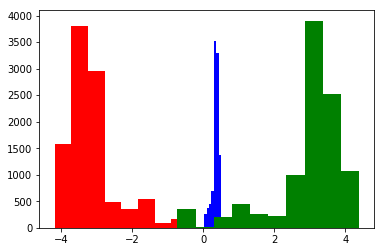

In [45]:
x_obs=x
y_obs=y

def model(x,a,b,c):
    return a*x**2+b*x+c

def loglikelihood(x_obs,y_obs,_a,_b,_c):
    d=y_obs-model(x_obs,_a,_b,_c)
    d=d/1.0
    d=-0.5*np.sum(d**2)
    return d

def logprior(a,b,c):
    p=-np.inf
    if a<10 and a>-10 and b>-10 and b<10 and c>-10 and c<10:
        p=0.0
    return p
N=10000

lista_a=[np.random.random()]
lista_b=[np.random.random()]
lista_c=[np.random.random()]

logposterior = [loglikelihood(x_obs, y_obs, lista_a[0], lista_b[0], lista_c[0]) + logprior(lista_a[0], lista_b[0], lista_c[0])]

sigma_delta_a=0.5
sigma_delta_b=0.5
sigma_delta_c=0.5

for i in range(1,N):
    propuesta_a=lista_a[i-1]+np.random.normal(loc=0.0,scale=sigma_delta_a)
    propuesta_b=lista_b[i-1]+np.random.normal(loc=0.0,scale=sigma_delta_b)
    propuesta_c=lista_c[i-1]+np.random.normal(loc=0.0,scale=sigma_delta_c)
    
    logposterior_viejo=loglikelihood(x_obs,y_obs,lista_a[i-1],lista_b[i-1],lista_c[i-1])+logprior(lista_a[i-1],lista_b[i-1],lista_c[i-1])
    logposterior_nuevo=loglikelihood(x_obs,y_obs,propuesta_a,propuesta_b,propuesta_c)+logprior(propuesta_a,propuesta_b,propuesta_c)

    r=min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha=np.random.random()
    
    if(alpha<r):
        lista_a.append(propuesta_a)
        lista_b.append(propuesta_b)
        lista_c.append(propuesta_c)
        logposterior.append(logposterior_viejo)        
    else: 
        lista_a.append(lista_a[i-1])
        lista_b.append(lista_b[i-1])
        lista_c.append(lista_c[i-1])
        logposterior.append(logposterior_viejo)
        
lista_a=np.array(lista_a)
lista_b=np.array(lista_b)
lista_c=np.array(lista_c)
logposterior=np.array(logposterior)

plt.hist(lista_a,color="blue")
plt.hist(lista_b,color="red")
plt.hist(lista_c,color="green")

a_=np.mean(lista_a)
b_=np.mean(lista_b)
c_=np.mean(lista_c)

print(a_)
print(b_)
print(a_)


# 2. Árboles de Decision.

Los árboles de decisión (DT) son un método de aprendizaje supervisado no paramétrico utilizado para la clasificación y la regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante el aprendizaje de reglas de decisión simples inferidas de las características de los datos.

Por ejemplo, en el ejemplo a continuación, los árboles de decisión aprenden de los datos para aproximar una curva sinusoidal con un conjunto de reglas de decisión si-entonces-otro. Cuanto más profundo es el árbol, más complejas son las reglas de decisión y más se ajusta el modelo.


Algunas ventajas de los árboles de decisión son:

- Simple de entender e interpretar. Los árboles pueden ser visualizados.
- Requiere poca preparación de datos. Otras técnicas a menudo requieren la normalización de datos, se deben crear variables ficticias y eliminar los valores en blanco. Sin embargo, tenga en cuenta que este módulo no admite valores faltantes.
- El costo de usar el árbol (es decir, predecir datos) es logarítmico en la cantidad de puntos de datos utilizados para entrenar el árbol.
- Capaz de manejar datos numéricos y categóricos. Otras técnicas suelen estar especializadas en el análisis de conjuntos de datos que tienen un solo tipo de variable. Ver algoritmos para más información.
- Capaz de manejar problemas de salida múltiple.
- Utiliza un modelo de caja blanca. Si una situación dada es observable en un modelo, la explicación de la condición se explica fácilmente por la lógica booleana. Por el contrario, en un modelo de caja negra (por ejemplo, en una red neuronal artificial), los resultados pueden ser más difíciles de interpretar.
- Posible validar un modelo utilizando pruebas estadísticas. Eso permite tener en cuenta la fiabilidad del modelo.
- Funciona bien incluso si sus supuestos son violados de alguna manera por el modelo verdadero a partir del cual se generaron los datos.



Las desventajas de los árboles de decisión incluyen:

- Los alumnos de los árboles de decisión pueden crear árboles demasiado complejos que no generalizan bien los datos. Esto se llama sobreajuste. Para evitar este problema, se necesitan mecanismos tales como la poda (actualmente no compatible), establecer el número mínimo de muestras requeridas en un nodo hoja o establecer la profundidad máxima del árbol.
- Los árboles de decisión pueden ser inestables porque pequeñas variaciones en los datos pueden generar un árbol completamente diferente. Este problema se mitiga mediante el uso de árboles de decisión dentro de un conjunto.
- Se sabe que el problema de aprender un árbol de decisión óptimo es NP-completo bajo varios aspectos de la optimización e incluso para conceptos simples. En consecuencia, los algoritmos prácticos de aprendizaje del árbol de decisiones se basan en algoritmos heurísticos como el algoritmo codicioso donde se toman decisiones localmente óptimas en cada nodo. Tales algoritmos no pueden garantizar la devolución del árbol de decisión globalmente óptimo. Esto puede mitigarse entrenando múltiples árboles en un conjunto de alumnos, donde las características y muestras se muestrean aleatoriamente con reemplazo.
- Hay conceptos que son difíciles de aprender porque los árboles de decisión no los expresan fácilmente, como XOR, problemas de paridad o multiplexor.
- Los alumnos del árbol de decisión crean árboles sesgados si algunas clases dominan. Por lo tanto, se recomienda equilibrar el conjunto de datos antes de ajustarlo con el árbol de decisión.



In [47]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
plt.figure(figsize=(15,15))
tree.plot_tree(clf.fit(iris.data, iris.target)) 
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

Los árboles de decisión se trabajarán un poco más a profundidad después de introducir ML.

### References:
- The Nature of Statistical Learning Theory. Vladimir N. Vapnik -Springer (2000)
- https://people.duke.edu/~ccc14/sta-663/MCMC.html
- https://scikit-learn.org/stable/modules/tree.html
- https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial